In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN

In [3]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.grid"] = False

In [4]:
%store -r Srilanka_2019

In [5]:
Srilanka_2019

,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
38,38,M Bhanuka (SL),1,1,0,36,36,36.00,39,92.30,...,-,-,-,-,-,-,-,-,0,0
57,57,PVD Chameera (SL),1,1,0,1,1,1.00,8,12.50,...,55,0,-,-,6.87,-,0,0,0,0
58,58,LD Chandimal (SL),2,2,0,13,10,6.50,30,43.33,...,-,-,-,-,-,-,-,-,0,0
71,71,A Dananjaya (SL),6,4,0,7,4,1.75,21,33.33,...,267,5,2/39,53.40,4.83,66.2,0,0,1,0
78,78,DM de Silva (SL),15,14,3,257,39,23.36,361,71.19,...,470,12,3/32,39.16,5.20,45.1,0,0,3,0
79,79,PWH de Silva (SL),3,3,1,52,30,26.00,40,130.00,...,133,4,2/63,33.25,5.54,36.0,0,0,1,0
82,82,N Dickwella (SL),6,6,0,147,76,24.50,121,121.48,...,-,-,-,-,-,-,-,-,7,2
98,98,N Pradeep (SL),11,9,6,11,6*,3.66,25,44.00,...,615,19,4/31,32.36,6.19,31.3,2,0,0,0
99,99,BOP Fernando (SL),6,6,0,128,49,21.33,203,63.05,...,16,0,-,-,8.00,-,0,0,1,0
100,100,MVT Fernando (SL),2,2,2,3,2*,-,17,17.64,...,90,2,1/43,45.00,9.00,30.0,0,0,0,0


In [6]:
Srilanka_2019=Srilanka_2019.reset_index()

In [7]:
Srilanka_2019

,index,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,38,38,M Bhanuka (SL),1,1,0,36,36,36.00,39,...,-,-,-,-,-,-,-,-,0,0
1,57,57,PVD Chameera (SL),1,1,0,1,1,1.00,8,...,55,0,-,-,6.87,-,0,0,0,0
2,58,58,LD Chandimal (SL),2,2,0,13,10,6.50,30,...,-,-,-,-,-,-,-,-,0,0
3,71,71,A Dananjaya (SL),6,4,0,7,4,1.75,21,...,267,5,2/39,53.40,4.83,66.2,0,0,1,0
4,78,78,DM de Silva (SL),15,14,3,257,39,23.36,361,...,470,12,3/32,39.16,5.20,45.1,0,0,3,0
5,79,79,PWH de Silva (SL),3,3,1,52,30,26.00,40,...,133,4,2/63,33.25,5.54,36.0,0,0,1,0
6,82,82,N Dickwella (SL),6,6,0,147,76,24.50,121,...,-,-,-,-,-,-,-,-,7,2
7,98,98,N Pradeep (SL),11,9,6,11,6*,3.66,25,...,615,19,4/31,32.36,6.19,31.3,2,0,0,0
8,99,99,BOP Fernando (SL),6,6,0,128,49,21.33,203,...,16,0,-,-,8.00,-,0,0,1,0
9,100,100,MVT Fernando (SL),2,2,2,3,2*,-,17,...,90,2,1/43,45.00,9.00,30.0,0,0,0,0


In [8]:
Srilanka_2019.drop(['index','Unnamed: 0_x'],inplace=True,axis=1)

In [9]:
Srilanka_2019

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,M Bhanuka (SL),1,1,0,36,36,36.00,39,92.30,0,...,-,-,-,-,-,-,-,-,0,0
1,PVD Chameera (SL),1,1,0,1,1,1.00,8,12.50,0,...,55,0,-,-,6.87,-,0,0,0,0
2,LD Chandimal (SL),2,2,0,13,10,6.50,30,43.33,0,...,-,-,-,-,-,-,-,-,0,0
3,A Dananjaya (SL),6,4,0,7,4,1.75,21,33.33,0,...,267,5,2/39,53.40,4.83,66.2,0,0,1,0
4,DM de Silva (SL),15,14,3,257,39,23.36,361,71.19,0,...,470,12,3/32,39.16,5.20,45.1,0,0,3,0
5,PWH de Silva (SL),3,3,1,52,30,26.00,40,130.00,0,...,133,4,2/63,33.25,5.54,36.0,0,0,1,0
6,N Dickwella (SL),6,6,0,147,76,24.50,121,121.48,0,...,-,-,-,-,-,-,-,-,7,2
7,N Pradeep (SL),11,9,6,11,6*,3.66,25,44.00,0,...,615,19,4/31,32.36,6.19,31.3,2,0,0,0
8,BOP Fernando (SL),6,6,0,128,49,21.33,203,63.05,0,...,16,0,-,-,8.00,-,0,0,1,0
9,MVT Fernando (SL),2,2,2,3,2*,-,17,17.64,0,...,90,2,1/43,45.00,9.00,30.0,0,0,0,0


In [10]:
Srilanka_2019_players =Srilanka_2019.copy()

In [11]:
Srilanka_2019_players.drop('Player',axis=1,inplace=True)

In [12]:
Srilanka_2019_players.HS=Srilanka_2019_players.HS.str.extract('(\d+)')
Srilanka_2019_players['HS'].fillna(value=0, inplace=True)


In [13]:
Srilanka_2019_players

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,1,1,0,36,36,36.00,39,92.30,0,0,...,-,-,-,-,-,-,-,-,0,0
1,1,1,0,1,1,1.00,8,12.50,0,0,...,55,0,-,-,6.87,-,0,0,0,0
2,2,2,0,13,10,6.50,30,43.33,0,0,...,-,-,-,-,-,-,-,-,0,0
3,6,4,0,7,4,1.75,21,33.33,0,0,...,267,5,2/39,53.40,4.83,66.2,0,0,1,0
4,15,14,3,257,39,23.36,361,71.19,0,0,...,470,12,3/32,39.16,5.20,45.1,0,0,3,0
5,3,3,1,52,30,26.00,40,130.00,0,0,...,133,4,2/63,33.25,5.54,36.0,0,0,1,0
6,6,6,0,147,76,24.50,121,121.48,0,1,...,-,-,-,-,-,-,-,-,7,2
7,11,9,6,11,6,3.66,25,44.00,0,0,...,615,19,4/31,32.36,6.19,31.3,2,0,0,0
8,6,6,0,128,49,21.33,203,63.05,0,0,...,16,0,-,-,8.00,-,0,0,1,0
9,2,2,2,3,2,-,17,17.64,0,0,...,90,2,1/43,45.00,9.00,30.0,0,0,0,0


In [14]:
Srilanka_2019_players.replace("-",0,inplace=True)

In [15]:
Srilanka_2019_players.drop('BBI',axis=1,inplace=True)

In [16]:
scaler = StandardScaler()

Srilanka_2019_players_scaled = pd.DataFrame(scaler.fit_transform(Srilanka_2019_players),columns=Srilanka_2019_players.columns)
Srilanka_2019_players_scaled.shape
Srilanka_2019_players_scaled.head()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-1.014264,-0.947937,-0.625867,-0.547626,-0.125998,1.052854,-0.584068,0.731881,-0.377964,-0.575766,...,-0.370701,-0.691263,-0.526055,-0.568178,-1.513618,-0.562953,-0.229416,0.0,-0.692121,-0.229416
1,-1.014264,-0.947937,-0.625867,-0.746190,-0.957190,-1.129083,-0.738895,-1.625552,-0.377964,-0.575766,...,-0.370701,-0.426882,-0.526055,-0.568178,0.817461,-0.562953,-0.229416,0.0,-0.692121,-0.229416
2,-0.827015,-0.754041,-0.625867,-0.678111,-0.743455,-0.786208,-0.629018,-0.714779,-0.377964,-0.575766,...,-0.370701,-0.691263,-0.526055,-0.568178,-1.513618,-0.562953,-0.229416,0.0,-0.692121,-0.229416
3,-0.078020,-0.366248,-0.625867,-0.712150,-0.885945,-1.082328,-0.673968,-1.010197,-0.377964,-0.575766,...,0.331680,0.592187,0.327007,0.425359,0.125263,0.635144,-0.229416,0.0,-0.320235,-0.229416
4,1.607218,1.572713,1.704948,0.706162,-0.054753,0.264863,1.024131,0.108254,-0.377964,-0.575766,...,0.331680,1.567993,1.521293,0.160416,0.250809,0.253273,-0.229416,0.0,0.423537,-0.229416


In [17]:
Srilanka_2019_players_scaled.describe()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
count,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,...,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,36.0,3.600000e+01,3.600000e+01
mean,-1.233581e-17,-8.018277e-17,-2.775558e-17,4.934325e-17,-5.859510e-17,-2.467162e-17,-5.859510e-17,3.947460e-16,1.541976e-17,-1.048544e-16,...,-3.700743e-17,6.322103e-17,-3.546546e-17,2.775558e-17,-4.934325e-17,4.548830e-17,8.172475e-17,0.0,-1.541976e-18,5.705313e-17
std,1.014185e+00,1.014185e+00,1.014185e+00,1.014185e+00,1.014185e+00,1.014185e+00,1.014185e+00,1.014185e+00,1.014185e+00,1.014185e+00,...,1.014185e+00,1.014185e+00,1.014185e+00,1.014185e+00,1.014185e+00,1.014185e+00,1.014185e+00,0.0,1.014185e+00,1.014185e+00
min,-1.014264e+00,-1.141833e+00,-6.258669e-01,-7.518632e-01,-9.809384e-01,-1.191424e+00,-7.788503e-01,-1.994824e+00,-3.779645e-01,-5.757663e-01,...,-3.707008e-01,-6.912629e-01,-5.260545e-01,-5.681778e-01,-1.513618e+00,-5.629527e-01,-2.294157e-01,0.0,-6.921207e-01,-2.294157e-01
25%,-8.270153e-01,-7.540407e-01,-6.258669e-01,-6.809476e-01,-8.384483e-01,-8.992007e-01,-6.589845e-01,-6.999348e-01,-3.779645e-01,-5.757663e-01,...,-3.707008e-01,-6.912629e-01,-5.260545e-01,-5.681778e-01,-1.513618e+00,-5.629527e-01,-2.294157e-01,0.0,-6.921207e-01,-2.294157e-01
50%,-3.588934e-01,-3.662483e-01,-6.258669e-01,-5.391163e-01,-4.109782e-01,-1.285092e-01,-5.341243e-01,1.048569e-01,-3.779645e-01,-5.757663e-01,...,-3.707008e-01,-4.388992e-01,-5.260545e-01,-5.681778e-01,3.831406e-01,-5.629527e-01,-2.294157e-01,0.0,-3.202349e-01,-2.294157e-01
75%,8.582234e-01,7.001807e-01,3.453059e-01,3.274726e-01,6.814454e-01,8.853125e-01,3.311571e-01,7.208027e-01,-3.779645e-01,3.663967e-01,...,-3.707008e-01,1.475460e-01,2.843538e-02,2.709332e-01,6.452597e-01,2.111952e-01,-2.294157e-01,0.0,1.446222e-01,-2.294157e-01
max,2.356213e+00,2.542194e+00,4.035762e+00,2.913056e+00,2.343829e+00,2.449294e+00,3.021895e+00,1.845606e+00,4.157609e+00,3.192886e+00,...,4.545963e+00,3.303294e+00,4.080477e+00,4.864648e+00,1.540197e+00,4.848391e+00,5.276562e+00,0.0,3.770508e+00,5.276562e+00


In [18]:
X =  Srilanka_2019_players_scaled.iloc[:,:].values

In [19]:
X

array([[-1.01426399e+00, -9.47936896e-01, -6.25866888e-01,
        -5.47626191e-01, -1.25998136e-01,  1.05285414e+00,
        -5.84068373e-01,  7.31880892e-01, -3.77964473e-01,
        -5.75766315e-01, -8.11652374e-01, -6.68239318e-01,
        -8.31890331e-02, -1.55465352e+00, -1.01426399e+00,
        -7.60251045e-01, -6.85669495e-01, -3.70700835e-01,
        -6.91262883e-01, -5.26054535e-01, -5.68177847e-01,
        -1.51361761e+00, -5.62952660e-01, -2.29415734e-01,
         0.00000000e+00, -6.92120693e-01, -2.29415734e-01],
       [-1.01426399e+00, -9.47936896e-01, -6.25866888e-01,
        -7.46189932e-01, -9.57190026e-01, -1.12908342e+00,
        -7.38895049e-01, -1.62555220e+00, -3.77964473e-01,
        -5.75766315e-01, -8.11652374e-01, -6.68239318e-01,
        -5.82323232e-01, -1.36974950e+00, -1.01426399e+00,
        -5.43036461e-01, -4.61192043e-01, -3.70700835e-01,
        -4.26881869e-01, -5.26054535e-01, -5.68177847e-01,
         8.17460958e-01, -5.62952660e-01, -2.29415734e-

In [20]:
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [21]:
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [22]:
np.any(np.isnan(Srilanka_2019_players_scaled))

False

In [23]:
Srilanka_2019_players_scaled

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-1.014264,-0.947937,-0.625867,-0.547626,-0.125998,1.052854,-0.584068,0.731881,-0.377964,-0.575766,...,-0.370701,-0.691263,-0.526055,-0.568178,-1.513618,-0.562953,-0.229416,0.0,-0.692121,-0.229416
1,-1.014264,-0.947937,-0.625867,-0.746190,-0.957190,-1.129083,-0.738895,-1.625552,-0.377964,-0.575766,...,-0.370701,-0.426882,-0.526055,-0.568178,0.817461,-0.562953,-0.229416,0.0,-0.692121,-0.229416
2,-0.827015,-0.754041,-0.625867,-0.678111,-0.743455,-0.786208,-0.629018,-0.714779,-0.377964,-0.575766,...,-0.370701,-0.691263,-0.526055,-0.568178,-1.513618,-0.562953,-0.229416,0.0,-0.692121,-0.229416
3,-0.078020,-0.366248,-0.625867,-0.712150,-0.885945,-1.082328,-0.673968,-1.010197,-0.377964,-0.575766,...,0.331680,0.592187,0.327007,0.425359,0.125263,0.635144,-0.229416,0.0,-0.320235,-0.229416
4,1.607218,1.572713,1.704948,0.706162,-0.054753,0.264863,1.024131,0.108254,-0.377964,-0.575766,...,0.331680,1.567993,1.521293,0.160416,0.250809,0.253273,-0.229416,0.0,0.423537,-0.229416
5,-0.639767,-0.560145,0.151071,-0.456854,-0.268488,0.429443,-0.579074,1.845606,-0.377964,-0.575766,...,0.331680,-0.051942,0.156395,0.050457,0.366175,0.088580,-0.229416,0.0,-0.320235,-0.229416
6,-0.078020,0.021544,-0.625867,0.082105,0.823935,0.335932,-0.174527,1.593910,-0.377964,0.366397,...,-0.370701,-0.691263,-0.526055,-0.568178,-1.513618,-0.562953,-0.229416,0.0,1.911080,5.276562
7,0.858223,0.603233,4.035762,-0.689457,-0.838448,-0.963256,-0.653990,-0.694987,-0.377964,-0.575766,...,3.141202,2.264998,2.715579,0.033898,0.586728,0.003519,5.276562,0.0,-0.692121,-0.229416
8,-0.078020,0.021544,-0.625867,-0.025687,0.182730,0.138311,0.235015,-0.132216,-0.377964,-0.575766,...,-0.370701,-0.614352,-0.526055,-0.568178,1.200884,-0.562953,-0.229416,0.0,-0.320235,-0.229416
9,-0.827015,-0.754041,0.928010,-0.734843,-0.933442,-1.191424,-0.693945,-1.473708,-0.377964,-0.575766,...,-0.370701,-0.258639,-0.184830,0.269073,1.540197,-0.020008,-0.229416,0.0,-0.692121,-0.229416


In [24]:
np.all(np.isfinite(Srilanka_2019_players_scaled))

True

K:\4th year\my research practical\jupyter\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


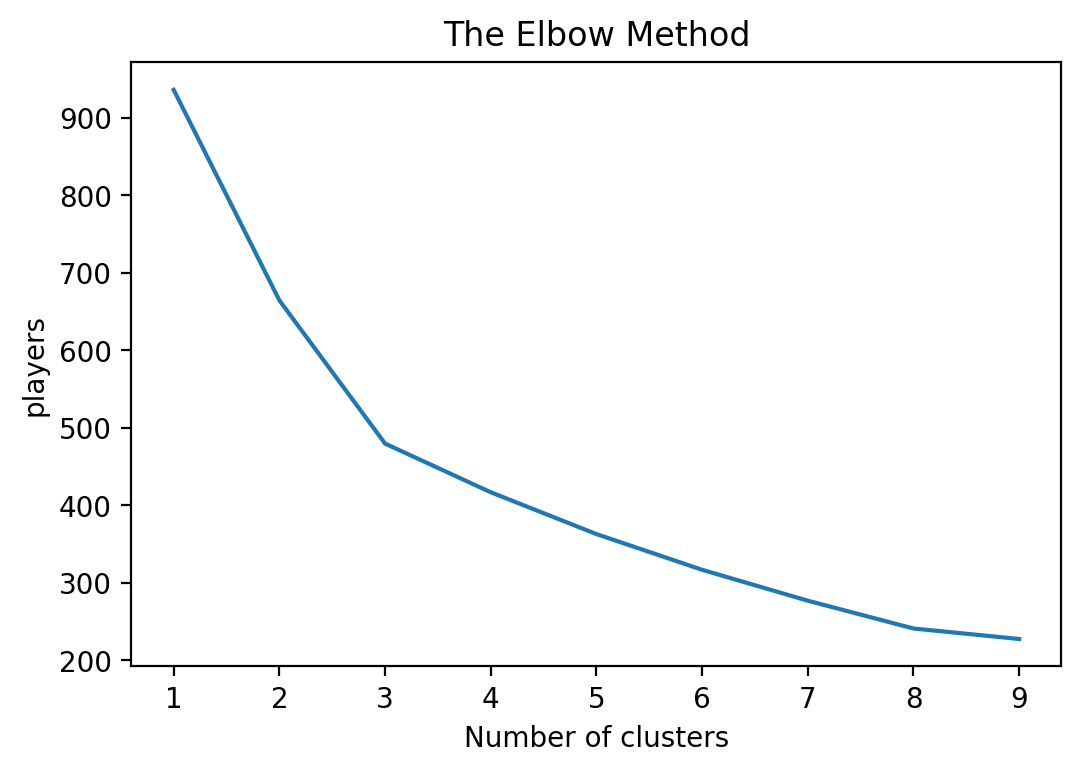

In [25]:
from sklearn.cluster import KMeans
players = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    players.append(kmeans.inertia_)
plt.plot(range(1, 10), players)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('players')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [27]:
y_kmeans

array([0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 1, 0, 1, 0, 1, 0, 0, 2, 1, 1, 0, 0,
       0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0])

In [28]:
kmeans.cluster_centers_

array([[-0.64790776, -0.65287749, -0.28806767, -0.57105918, -0.51216679,
        -0.36903732, -0.56061637, -0.31356375, -0.37796447, -0.49383909,
        -0.3697698 , -0.53055209, -0.38700985,  0.03205144, -0.64790776,
        -0.27860131, -0.25416039, -0.27908598, -0.25069753, -0.28868093,
         0.13954557,  0.17660245,  0.13091424, -0.22941573,  0.        ,
        -0.46575546, -0.22941573],
       [ 0.95184774,  1.03949898, -0.04316323,  1.51389094,  1.25437411,
         1.25164424,  1.51108616,  0.68206609,  1.0394023 ,  1.54410057,
         0.29995849,  1.51935706,  0.50953283, -0.10704969,  0.95184774,
        -0.62449193, -0.66111727, -0.37070084, -0.66662738, -0.504728  ,
        -0.55422367, -0.79257802, -0.53580545, -0.22941573,  0.        ,
         1.16730803,  0.80295507],
       [ 1.45741933,  1.34003807,  1.39417245,  0.20464673,  0.34896866,
        -0.30505911,  0.16109743,  0.3510875 ,  0.07559289, -0.19890109,
         1.22100748,  0.00956832,  0.96499278,  0.0238

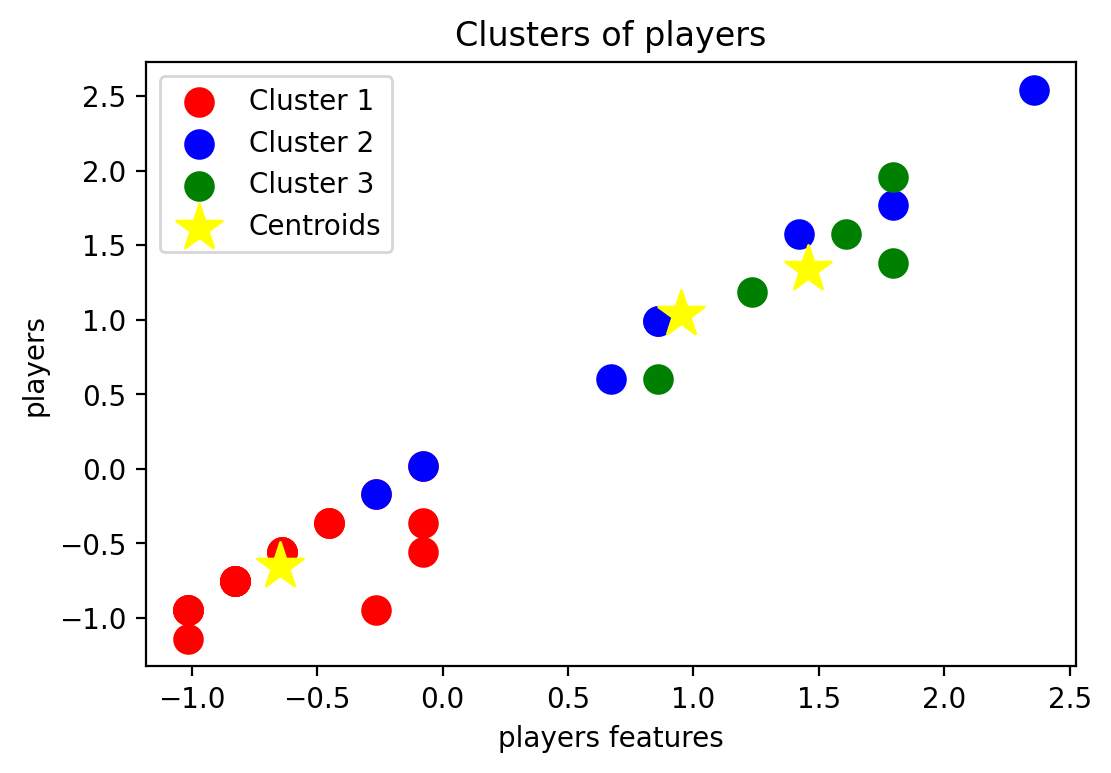

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,marker='*', c = 'yellow', label = 'Centroids')
plt.title('Clusters of players')
plt.xlabel('players features')
plt.ylabel('players')
plt.legend()
plt.show()

In [30]:
Srilanka_2019

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,M Bhanuka (SL),1,1,0,36,36,36.00,39,92.30,0,...,-,-,-,-,-,-,-,-,0,0
1,PVD Chameera (SL),1,1,0,1,1,1.00,8,12.50,0,...,55,0,-,-,6.87,-,0,0,0,0
2,LD Chandimal (SL),2,2,0,13,10,6.50,30,43.33,0,...,-,-,-,-,-,-,-,-,0,0
3,A Dananjaya (SL),6,4,0,7,4,1.75,21,33.33,0,...,267,5,2/39,53.40,4.83,66.2,0,0,1,0
4,DM de Silva (SL),15,14,3,257,39,23.36,361,71.19,0,...,470,12,3/32,39.16,5.20,45.1,0,0,3,0
5,PWH de Silva (SL),3,3,1,52,30,26.00,40,130.00,0,...,133,4,2/63,33.25,5.54,36.0,0,0,1,0
6,N Dickwella (SL),6,6,0,147,76,24.50,121,121.48,0,...,-,-,-,-,-,-,-,-,7,2
7,N Pradeep (SL),11,9,6,11,6*,3.66,25,44.00,0,...,615,19,4/31,32.36,6.19,31.3,2,0,0,0
8,BOP Fernando (SL),6,6,0,128,49,21.33,203,63.05,0,...,16,0,-,-,8.00,-,0,0,1,0
9,MVT Fernando (SL),2,2,2,3,2*,-,17,17.64,0,...,90,2,1/43,45.00,9.00,30.0,0,0,0,0


In [31]:
Srilanka_2019["cluster"] = y_kmeans

In [32]:
Srilanka_2019

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,M Bhanuka (SL),1,1,0,36,36,36.00,39,92.30,0,...,-,-,-,-,-,-,-,0,0,0
1,PVD Chameera (SL),1,1,0,1,1,1.00,8,12.50,0,...,0,-,-,6.87,-,0,0,0,0,0
2,LD Chandimal (SL),2,2,0,13,10,6.50,30,43.33,0,...,-,-,-,-,-,-,-,0,0,0
3,A Dananjaya (SL),6,4,0,7,4,1.75,21,33.33,0,...,5,2/39,53.40,4.83,66.2,0,0,1,0,0
4,DM de Silva (SL),15,14,3,257,39,23.36,361,71.19,0,...,12,3/32,39.16,5.20,45.1,0,0,3,0,2
5,PWH de Silva (SL),3,3,1,52,30,26.00,40,130.00,0,...,4,2/63,33.25,5.54,36.0,0,0,1,0,0
6,N Dickwella (SL),6,6,0,147,76,24.50,121,121.48,0,...,-,-,-,-,-,-,-,7,2,1
7,N Pradeep (SL),11,9,6,11,6*,3.66,25,44.00,0,...,19,4/31,32.36,6.19,31.3,2,0,0,0,2
8,BOP Fernando (SL),6,6,0,128,49,21.33,203,63.05,0,...,0,-,-,8.00,-,0,0,1,0,0
9,MVT Fernando (SL),2,2,2,3,2*,-,17,17.64,0,...,2,1/43,45.00,9.00,30.0,0,0,0,0,0


In [33]:
Srilanka_2019['cluster'].value_counts()

0    23
1     8
2     5
Name: cluster, dtype: int64

In [34]:
SL_Cluster_2019 = np.array([23,8,5])

In [35]:
SL_Cluster_2019

array([23,  8,  5])

In [36]:
%store SL_Cluster_2019

Stored 'SL_Cluster_2019' (ndarray)


In [37]:
Srilanka_2019_players_scaled.insert(0, 'Player', Srilanka_2019.Player)

In [38]:
Srilanka_2019_players_scaled

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,M Bhanuka (SL),-1.014264,-0.947937,-0.625867,-0.547626,-0.125998,1.052854,-0.584068,0.731881,-0.377964,...,-0.370701,-0.691263,-0.526055,-0.568178,-1.513618,-0.562953,-0.229416,0.0,-0.692121,-0.229416
1,PVD Chameera (SL),-1.014264,-0.947937,-0.625867,-0.746190,-0.957190,-1.129083,-0.738895,-1.625552,-0.377964,...,-0.370701,-0.426882,-0.526055,-0.568178,0.817461,-0.562953,-0.229416,0.0,-0.692121,-0.229416
2,LD Chandimal (SL),-0.827015,-0.754041,-0.625867,-0.678111,-0.743455,-0.786208,-0.629018,-0.714779,-0.377964,...,-0.370701,-0.691263,-0.526055,-0.568178,-1.513618,-0.562953,-0.229416,0.0,-0.692121,-0.229416
3,A Dananjaya (SL),-0.078020,-0.366248,-0.625867,-0.712150,-0.885945,-1.082328,-0.673968,-1.010197,-0.377964,...,0.331680,0.592187,0.327007,0.425359,0.125263,0.635144,-0.229416,0.0,-0.320235,-0.229416
4,DM de Silva (SL),1.607218,1.572713,1.704948,0.706162,-0.054753,0.264863,1.024131,0.108254,-0.377964,...,0.331680,1.567993,1.521293,0.160416,0.250809,0.253273,-0.229416,0.0,0.423537,-0.229416
5,PWH de Silva (SL),-0.639767,-0.560145,0.151071,-0.456854,-0.268488,0.429443,-0.579074,1.845606,-0.377964,...,0.331680,-0.051942,0.156395,0.050457,0.366175,0.088580,-0.229416,0.0,-0.320235,-0.229416
6,N Dickwella (SL),-0.078020,0.021544,-0.625867,0.082105,0.823935,0.335932,-0.174527,1.593910,-0.377964,...,-0.370701,-0.691263,-0.526055,-0.568178,-1.513618,-0.562953,-0.229416,0.0,1.911080,5.276562
7,N Pradeep (SL),0.858223,0.603233,4.035762,-0.689457,-0.838448,-0.963256,-0.653990,-0.694987,-0.377964,...,3.141202,2.264998,2.715579,0.033898,0.586728,0.003519,5.276562,0.0,-0.692121,-0.229416
8,BOP Fernando (SL),-0.078020,0.021544,-0.625867,-0.025687,0.182730,0.138311,0.235015,-0.132216,-0.377964,...,-0.370701,-0.614352,-0.526055,-0.568178,1.200884,-0.562953,-0.229416,0.0,-0.320235,-0.229416
9,MVT Fernando (SL),-0.827015,-0.754041,0.928010,-0.734843,-0.933442,-1.191424,-0.693945,-1.473708,-0.377964,...,-0.370701,-0.258639,-0.184830,0.269073,1.540197,-0.020008,-0.229416,0.0,-0.692121,-0.229416


In [39]:
Srilanka_2019_players_scaled

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,M Bhanuka (SL),-1.014264,-0.947937,-0.625867,-0.547626,-0.125998,1.052854,-0.584068,0.731881,-0.377964,...,-0.370701,-0.691263,-0.526055,-0.568178,-1.513618,-0.562953,-0.229416,0.0,-0.692121,-0.229416
1,PVD Chameera (SL),-1.014264,-0.947937,-0.625867,-0.746190,-0.957190,-1.129083,-0.738895,-1.625552,-0.377964,...,-0.370701,-0.426882,-0.526055,-0.568178,0.817461,-0.562953,-0.229416,0.0,-0.692121,-0.229416
2,LD Chandimal (SL),-0.827015,-0.754041,-0.625867,-0.678111,-0.743455,-0.786208,-0.629018,-0.714779,-0.377964,...,-0.370701,-0.691263,-0.526055,-0.568178,-1.513618,-0.562953,-0.229416,0.0,-0.692121,-0.229416
3,A Dananjaya (SL),-0.078020,-0.366248,-0.625867,-0.712150,-0.885945,-1.082328,-0.673968,-1.010197,-0.377964,...,0.331680,0.592187,0.327007,0.425359,0.125263,0.635144,-0.229416,0.0,-0.320235,-0.229416
4,DM de Silva (SL),1.607218,1.572713,1.704948,0.706162,-0.054753,0.264863,1.024131,0.108254,-0.377964,...,0.331680,1.567993,1.521293,0.160416,0.250809,0.253273,-0.229416,0.0,0.423537,-0.229416
5,PWH de Silva (SL),-0.639767,-0.560145,0.151071,-0.456854,-0.268488,0.429443,-0.579074,1.845606,-0.377964,...,0.331680,-0.051942,0.156395,0.050457,0.366175,0.088580,-0.229416,0.0,-0.320235,-0.229416
6,N Dickwella (SL),-0.078020,0.021544,-0.625867,0.082105,0.823935,0.335932,-0.174527,1.593910,-0.377964,...,-0.370701,-0.691263,-0.526055,-0.568178,-1.513618,-0.562953,-0.229416,0.0,1.911080,5.276562
7,N Pradeep (SL),0.858223,0.603233,4.035762,-0.689457,-0.838448,-0.963256,-0.653990,-0.694987,-0.377964,...,3.141202,2.264998,2.715579,0.033898,0.586728,0.003519,5.276562,0.0,-0.692121,-0.229416
8,BOP Fernando (SL),-0.078020,0.021544,-0.625867,-0.025687,0.182730,0.138311,0.235015,-0.132216,-0.377964,...,-0.370701,-0.614352,-0.526055,-0.568178,1.200884,-0.562953,-0.229416,0.0,-0.320235,-0.229416
9,MVT Fernando (SL),-0.827015,-0.754041,0.928010,-0.734843,-0.933442,-1.191424,-0.693945,-1.473708,-0.377964,...,-0.370701,-0.258639,-0.184830,0.269073,1.540197,-0.020008,-0.229416,0.0,-0.692121,-0.229416


In [40]:
Srilanka_2019_players_scaled[['Player','Ave_x','Ave_y']]

,Player,Ave_x,Ave_y
0,M Bhanuka (SL),1.052854,-0.568178
1,PVD Chameera (SL),-1.129083,-0.568178
2,LD Chandimal (SL),-0.786208,-0.568178
3,A Dananjaya (SL),-1.082328,0.425359
4,DM de Silva (SL),0.264863,0.160416
5,PWH de Silva (SL),0.429443,0.050457
6,N Dickwella (SL),0.335932,-0.568178
7,N Pradeep (SL),-0.963256,0.033898
8,BOP Fernando (SL),0.138311,-0.568178
9,MVT Fernando (SL),-1.191424,0.269073


In [41]:
SL_2019_Ave=Srilanka_2019_players_scaled.mean()

In [42]:
SL_2019_Ave

Mat_x          -1.233581e-17
Inns_x         -8.018277e-17
NO             -2.775558e-17
Runs_x          4.934325e-17
HS             -5.859510e-17
Ave_x          -2.467162e-17
BF             -5.859510e-17
SR_x            3.947460e-16
100             1.541976e-17
50             -1.048544e-16
0               3.083953e-17
4s             -4.009139e-17
6s             -1.233581e-17
Unnamed: 0_y   -1.233581e-16
Mat_y          -1.233581e-17
Inns_y          9.251859e-18
Overs           2.621360e-17
Mdns           -3.700743e-17
Runs_y          6.322103e-17
Wkts           -3.546546e-17
Ave_y           2.775558e-17
Econ           -4.934325e-17
SR_y            4.548830e-17
4               8.172475e-17
5               0.000000e+00
Ct             -1.541976e-18
St              5.705313e-17
dtype: float64

In [43]:
SL_Ave_2019 =SL_2019_Ave[['Ave_x','Ave_y']]

In [44]:
SL_Ave_2019

Ave_x   -2.467162e-17
Ave_y    2.775558e-17
dtype: float64

In [45]:
SL_Ave_2019 = np.array([SL_Ave_2019.Ave_x, SL_Ave_2019.Ave_y])

In [46]:
SL_Ave_2019

array([-2.46716228e-17,  2.77555756e-17])

In [47]:
%store SL_Ave_2019

Stored 'SL_Ave_2019' (ndarray)


In [48]:
Srilanka_2019

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,M Bhanuka (SL),1,1,0,36,36,36.00,39,92.30,0,...,-,-,-,-,-,-,-,0,0,0
1,PVD Chameera (SL),1,1,0,1,1,1.00,8,12.50,0,...,0,-,-,6.87,-,0,0,0,0,0
2,LD Chandimal (SL),2,2,0,13,10,6.50,30,43.33,0,...,-,-,-,-,-,-,-,0,0,0
3,A Dananjaya (SL),6,4,0,7,4,1.75,21,33.33,0,...,5,2/39,53.40,4.83,66.2,0,0,1,0,0
4,DM de Silva (SL),15,14,3,257,39,23.36,361,71.19,0,...,12,3/32,39.16,5.20,45.1,0,0,3,0,2
5,PWH de Silva (SL),3,3,1,52,30,26.00,40,130.00,0,...,4,2/63,33.25,5.54,36.0,0,0,1,0,0
6,N Dickwella (SL),6,6,0,147,76,24.50,121,121.48,0,...,-,-,-,-,-,-,-,7,2,1
7,N Pradeep (SL),11,9,6,11,6*,3.66,25,44.00,0,...,19,4/31,32.36,6.19,31.3,2,0,0,0,2
8,BOP Fernando (SL),6,6,0,128,49,21.33,203,63.05,0,...,0,-,-,8.00,-,0,0,1,0,0
9,MVT Fernando (SL),2,2,2,3,2*,-,17,17.64,0,...,2,1/43,45.00,9.00,30.0,0,0,0,0,0
